# Using Python for Research Homework: Week 3, Case Study 2

In this case study, we will find and plot the distribution of word frequencies for each translation of Hamlet.  Perhaps the distribution of word frequencies of Hamlet depends on the translation --- let's find out!

In [1]:
# DO NOT EDIT THIS CODE!
import os
import pandas as pd
import numpy as np
from collections import Counter

%matplotlib inline

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def read_book(title_path):
    text   = pd.read_csv(title_path, sep = "\n", engine='python', encoding="utf8")
    text = text.to_string(index = False)
    return text

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

### Exercise 1 

In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions `count_words_fast`, `read_book`, and `word_stats` are already defined as in the Case 2 Videos (Videos 3.2.x).

#### Instructions 
- Read in the data as a pandas dataframe using `pd.read_csv`. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@hamlets.csv

In [2]:
hamlets = pd.read_csv('data/hamlets.csv', index_col=0)
hamlets

,language,text
1,English,The Tragedie of Hamlet\n ...
2,German,"Hamlet, Prinz von Dännemark.\n ..."
3,Portuguese,HAMLET\n DRAMA EM ...


### Exercise 2 

In this exercise, we will summarize the text for a single translation of Hamlet in a `pandas` dataframe. 

#### Instructions
- Find the dictionary of word frequency in `text` by calling `count_words_fast()`. Store this as `counted_text`.
- Create a `pandas` dataframe named `data`.
- Using `counted_text`, define two columns in data:
    - `word`, consisting of each unique word in text.
    - `count`, consisting of the number of times each word in `word` is included in the text.

In [3]:
language, text = hamlets.iloc[0]

counted_text = count_words_fast(text)

data = pd.DataFrame.from_dict(counted_text, orient='index').reset_index()
data.columns = ['word', 'count']

data[data.word == 'hamlet'] #How many times does the word Hamlet appear in the text?

,word,count
3,hamlet,97


### Exercise 3

In this exercise, we will continue to define summary statistics for a single translation of Hamlet. 

#### Instructions
- Add a column to data named `length`, defined as the length of each word.
- Add another column named `frequency`, which is defined as follows for each word in `data`:
    - If `count > 10`, `frequency` is "frequent".
    - If `1 < count <= 10`, `frequency` is "infrequent".
    - If `count == 1`, `frequency` is "unique".

In [4]:
def map_freq(count):
    if count > 10:
        return 'frequent'
    elif count > 1:
        return 'infrequent'
    else:
        return 'unique'

data['length'] = data.word.str.len()
data['frequency'] = data['count'].apply(map_freq)

data[data.frequency == 'unique'].shape[0] #How many unique words appear in the text?

3348

### Exercise 4

In this exercise, we will summarize the statistics in data into a smaller pandas dataframe. 

#### Instructions 
- Create a `pandas` dataframe named `sub_data` including the following columns:
    - `language`, which is the language of the text.
    - `frequency`, which is a list containing the strings "frequent", "infrequent", and "unique".
    - `mean_word_length`, which is the mean word length of each value in frequency.
    - `num_words`, which is the total number of words in each frequency category.

In [5]:
sub_data = data.groupby(['frequency'], as_index=False).agg({'length':['mean','sum']})

sub_data.columns = sub_data.columns.droplevel(0)

sub_data.columns = ['frequency', 'mean_word_length', 'num_words']

sub_data['language'] = 'English'

sub_data

,frequency,mean_word_length,num_words,language
0,frequent,4.371517,1412,English
1,infrequent,5.825243,8400,English
2,unique,7.005675,23455,English


### Exercise 5

In this exercise, we will join all the data summaries for text Hamlet translation.

#### Instructions 
- The previous code for summarizing a particular translation of Hamlet is consolidated into a single function called `summarize_text`. Create a pandas dataframe` grouped_data` consisting of the results of `summarize_text` for each translation of Hamlet in `hamlets`.
    - Use a `for` loop across the row indices of `hamlets` to assign each translation to a new row.
    - Obtain the `ith` row of `hamlets` to variables using the `.iloc` method, and assign the output to variables `language` and `text`.
    - Call `summarize_text` using `language` and `text`, and assign the output to `sub_data`.
    - Use the pandas `.append()` function to append to pandas dataframes row-wise to `grouped_data`.

In [6]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)

grouped_data = pd.DataFrame()

for index, row in hamlets.iterrows():
    sub_data = summarize_text(row.language, row.text)
    grouped_data = grouped_data.append(sub_data, ignore_index=True)

grouped_data

,language,frequency,mean_word_length,num_words
0,English,frequent,4.371517,323
1,English,infrequent,5.825243,1442
2,English,unique,7.005675,3348
3,German,frequent,4.528053,303
4,German,infrequent,6.481830,1596
5,German,unique,9.006987,5582
6,Portuguese,frequent,4.417625,261
7,Portuguese,infrequent,6.497870,1643
8,Portuguese,unique,8.669778,5357


### Exercise 6

In this exercise, we will plot our results and look for differences across each translation.

#### Instructions 
- Plot the word statistics of each translations on a single plot. Note that we have already done most of the work for you.
- Consider: do the word statistics differ by translation?

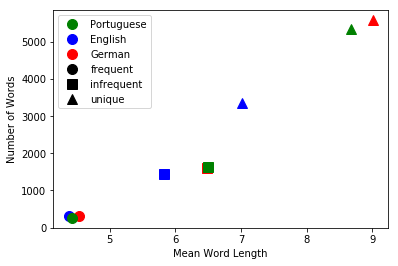

In [7]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")

plt.show();